# Локальный экстремум функций нескольких переменных

В этом задании мы научимся находить точки локального экстремума функции двумя способами: 
* примерно по графику
* точно путем подсчета производных с помощью библиотеки для символьных вычислений sympy

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sympy.solvers import solve, solveset
from sympy import S
from sympy import Symbol, simplify, factor

### Пример 1.

Найдём точку локального максимума функции $f(x, y) = \frac{x + y}{x^2 + y^4 + 1}$. Для начала построим линии уровня этой функции и посмотрим что она из себя представляет. В этом нам помогут функции `contour` из библиотеки matplotlib и `meshgrid` из numpy.

`meshgrid` строит декартово произведение массивов, переданных ей:

In [2]:
rnge = np.arange(-2, 2, 0.05)

xx, yy = np.meshgrid(rnge, rnge)
xx, yy

(array([[-2.  , -1.95, -1.9 , ...,  1.85,  1.9 ,  1.95],
        [-2.  , -1.95, -1.9 , ...,  1.85,  1.9 ,  1.95],
        [-2.  , -1.95, -1.9 , ...,  1.85,  1.9 ,  1.95],
        ...,
        [-2.  , -1.95, -1.9 , ...,  1.85,  1.9 ,  1.95],
        [-2.  , -1.95, -1.9 , ...,  1.85,  1.9 ,  1.95],
        [-2.  , -1.95, -1.9 , ...,  1.85,  1.9 ,  1.95]]),
 array([[-2.  , -2.  , -2.  , ..., -2.  , -2.  , -2.  ],
        [-1.95, -1.95, -1.95, ..., -1.95, -1.95, -1.95],
        [-1.9 , -1.9 , -1.9 , ..., -1.9 , -1.9 , -1.9 ],
        ...,
        [ 1.85,  1.85,  1.85, ...,  1.85,  1.85,  1.85],
        [ 1.9 ,  1.9 ,  1.9 , ...,  1.9 ,  1.9 ,  1.9 ],
        [ 1.95,  1.95,  1.95, ...,  1.95,  1.95,  1.95]]))

`contour`, в свою очередь, строит сами линии контура по массивам координат `x`, `y` и координате-цвету `z`:

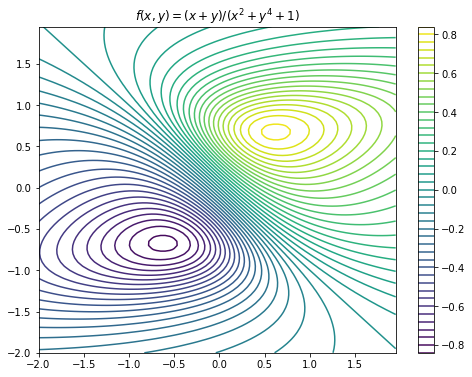

In [3]:
def f(x, y):
    return (x + y) / (x ** 2 + y ** 4 + 1)

plt.figure(figsize=(8, 6))
contour = plt.contour(xx, yy, f(xx, yy), levels=50)
plt.title('$f(x, y) = (x + y) / (x^2 + y^4 + 1)$')
plt.colorbar(contour)  # шкала справа от графика
plt.show()

Видим, что в отображенной части пространства есть точка локального минимума с примерными координатами $(-0.6, -0.6)$ и точка локального максимума с примерными координатами $(0.6, 0.6)$. Можно попробовать более точно определить координаты точки локального максимума нарисовав его окрестность в более высоком разрешении. Однако, мы воспользуемся для этого более точным способом.

Найдём точку локального максимума с помощью SymPy. Для начала запишем исходную функцию через представителей класса `Symbol`:

In [4]:
x = Symbol('x')
y = Symbol('y')
z = f(x, y)
z

(x + y)/(x**2 + y**4 + 1)

В точке локального максимума должно одновременно выполняться условия равенства нулю производной по $x$ и по $y$.

Производная по $x$:

In [5]:
factor(z.diff(x))

-(x**2 + 2*x*y - y**4 - 1)/(x**2 + y**4 + 1)**2

Производная по $y$:

In [6]:
factor(z.diff(y))

(x**2 - 4*x*y**3 - 3*y**4 + 1)/(x**2 + y**4 + 1)**2

Получили систему из двух уравнений:
$\left\{
  \begin{aligned}
f'_x = 0\\f'_x = 0
\end{aligned}\right.$

Заметим, что, просуммировав оба уравнения, из получившегося уравнения легко выразить $x$:

In [7]:
solx = solve(z.diff(x) + z.diff(y), x)[0]
solx

-(y**4 - 1)/(2*y**3 + y)

Подставим икс в уравнение $f'_x = 0$:

In [8]:
fact = factor(z.diff(x).subs(x, solx))
fact

y**2*(2*y**2 + 1)**2*(4*y**6 + 3*y**4 - 1)/((y**2 - y + 1)*(y**2 + y + 1)*(4*y**6 + y**4 + 1)**2)

Легко заметить уравнение на $y$. Решим его:

In [9]:
soly = solveset(fact, y, domain=S.Reals)
soly

FiniteSet(0, -sqrt(-(4*sqrt(3) + 7)**(1/3) + 1 + (4*sqrt(3) + 7)**(2/3))/(2*(4*sqrt(3) + 7)**(1/6)), sqrt(-(4*sqrt(3) + 7)**(1/3) + 1 + (4*sqrt(3) + 7)**(2/3))/(2*(4*sqrt(3) + 7)**(1/6)))

Очевидно, нам нужно большее из этих трёх чисел. Подставим его в выражение $x(y)$, и наше решение будет завершено.

In [10]:
y0 = soly.sup
x0 = solx.subs(y, y0)
simplify(x0)

(-4*sqrt(3)*(4*sqrt(3) + 7)**(1/3) - 5*(4*sqrt(3) + 7)**(1/3) + 13 + 8*sqrt(3) + 13*(4*sqrt(3) + 7)**(2/3))/(4*((4*sqrt(3) + 7)**(1/6) + sqrt(4*sqrt(3) + 7) + (4*sqrt(3) + 7)**(5/6))*sqrt(-(4*sqrt(3) + 7)**(1/3) + 1 + (4*sqrt(3) + 7)**(2/3)))

Проверим, что координаты найденной нами точки похожи на примерные координаты, которые мы ожидали из графика функции.

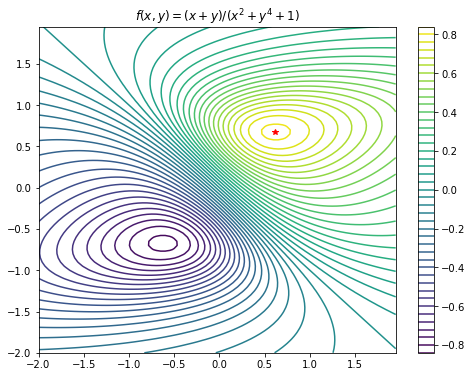

(x0, y0) = (0.6146585095750963,0.6748407524009116)


In [11]:
plt.figure(figsize=(8, 6))
contour = plt.contour(xx, yy, f(xx, yy), levels=50)
plt.title('$f(x, y) = (x + y) / (x^2 + y^4 + 1)$')
plt.colorbar(contour)  # шкала справа от графика
plt.plot(x0,y0,'r*')
plt.show()

print('(x0, y0) = ({},{})'.format(float(x0),float(y0)))

### Пример 2.

Далее, давайте найдём локальный максимум функции $f(x, y) = x y$ на единичной окружности $x^2 + y^2 = 1$. Для начала посмотрим на линии уровня функции и на окружность:

In [ ]:
def g(x, y):
    return x * y

def circle(x, y):
    return x ** 2 + y ** 2 - 1

plt.figure(figsize=(8, 8))
plt.contour(xx, yy, g(xx, yy), levels=50)
plt.contour(xx, yy, circle(xx, yy), levels=[0], colors='r')
plt.show()


Судя по графику, максимальные значения функции на окружности достигаются в точках пересечения окружности с линией $y=x$. Проверим это. 

Для решения задачи условной оптимизации нам понадобится для начала записать функцию Лагранжа:

In [ ]:
lam = Symbol('lambda')
L = g(x, y) + lam * circle(x, y)
L

Выразим $y$ из $L'_x = 0$:

In [ ]:
soly = solve(L.diff(x), y)[0]
soly

А $x$ &mdash; из $L'_y = 0$:

In [ ]:
solx = solve(L.diff(y), x)[0]
solx

Получаем, что $x = y$ и $-2\lambda = 1$, т.е. $\lambda = -0.5$. Отсюда находим подходящие $x$ и $y$:

In [ ]:
sols = solve(L.diff(lam).subs(y, x), x)
sols

Проверим, что найденные решения совпадают с нашими ожиданиями:

In [ ]:
plt.figure(figsize=(8, 8))
plt.contour(xx, yy, g(xx, yy), levels=50)
plt.contour(xx, yy, circle(xx, yy), levels=[0], colors='r')
plt.plot(sols,sols,'r*')
plt.show()

## Задачи

**Задача №1:** Изобразите линии уровня функции
$f(x,y)=\frac{x+y^2+1}{x^4+y^2+x^2*y+1}$.
Найдите ближайшую к началу координат точку ее локального максимума.
В ответе укажите сумму координат точки с точностью до $10^{-3}$.

**Указание:** для поиска точного решения напишите систему алгебраических уравнений и исключайте из нее по очереди каждую из неизвестных (с помощью функций библиотеки SymPy)

In [ ]:
# Поместите ответ на задачу №1 в переменную smax в этой клетке.
smax = ...

# your code here


In [ ]:
# Проверка решения на корректность.


**Задача №2:** Изобразите линии уровня функции 
$f(x,y)=x^5+2x^2y-y^4$
и эллипс
$16x^2+9y^2=16$.
Найдите точку условного локального максимума функции на эллипсе, расположенную в полуплоскости $x<0$.
В ответе укажите сумму координат точки с точностью до $10^{-3}$.

In [ ]:
# Поместите ответ на задачу №2 в переменную smax_2 в этой клетке.
smax_2 = ...

# your code here


In [ ]:
# Проверка решения на корректность.


**Задача №3** Найдите наибольшее значение функции
$f(x,y)=\frac{x^3-y^3-2xy+1}{x^2+y^2-xy+1}$
в единичном квадрате $[0;1]^2$. Дайте точный ответ.

**Указание:** постройте линии уровня.

In [ ]:
# Поместите ответ на задачу №3 в переменную fmax в этой клетке.
fmax = ...

# your code here


In [ ]:
# Проверка решения на корректность.
